In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, plot_confusion_matrix, classification_report
from imblearn.over_sampling import SMOTE
import pickle
from pprint import pprint
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.metrics import auc


%matplotlib inline

In [2]:
urban_dropouts = pd.read_csv('data/urbanicity.csv', index_col='sid')

In [3]:
urban_dropouts[urban_dropouts['dropout'].isnull()]

,Urbanicity_City: Large,Urbanicity_City: Small,Urbanicity_Rural: Distant,Urbanicity_Rural: Fringe,Urbanicity_Rural: Remote,Urbanicity_Suburb: Large,Urbanicity_Suburb: Mid-size,Urbanicity_Suburb: Small,Urbanicity_Town: Distant,Urbanicity_Town: Fringe,Urbanicity_Town: Remote,dropout,urbanicity
sid,,,,,,,,,,,,,
7230,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN
8773,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN
13560,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN
17304,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN
19990,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
111984,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN
111985,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN
111986,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN


In [4]:
urban_dropouts.dropna(subset = ['dropout'], inplace=True)

In [5]:
urban_dropouts.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25128 entries, 2 to 52941
Data columns (total 13 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Urbanicity_City: Large       25128 non-null  int64  
 1   Urbanicity_City: Small       25128 non-null  int64  
 2   Urbanicity_Rural: Distant    25128 non-null  int64  
 3   Urbanicity_Rural: Fringe     25128 non-null  int64  
 4   Urbanicity_Rural: Remote     25128 non-null  int64  
 5   Urbanicity_Suburb: Large     25128 non-null  int64  
 6   Urbanicity_Suburb: Mid-size  25128 non-null  int64  
 7   Urbanicity_Suburb: Small     25128 non-null  int64  
 8   Urbanicity_Town: Distant     25128 non-null  int64  
 9   Urbanicity_Town: Fringe      25128 non-null  int64  
 10  Urbanicity_Town: Remote      25128 non-null  int64  
 11  dropout                      25128 non-null  float64
 12  urbanicity                   24926 non-null  object 
dtypes: float64(1), i

In [6]:
urban_dropouts.describe()

,Urbanicity_City: Large,Urbanicity_City: Small,Urbanicity_Rural: Distant,Urbanicity_Rural: Fringe,Urbanicity_Rural: Remote,Urbanicity_Suburb: Large,Urbanicity_Suburb: Mid-size,Urbanicity_Suburb: Small,Urbanicity_Town: Distant,Urbanicity_Town: Fringe,Urbanicity_Town: Remote,dropout
count,25128.000000,25128.000000,25128.000000,25128.000000,25128.000000,25128.000000,25128.000000,25128.000000,25128.000000,25128.000000,25128.000000,25128.000000
mean,0.169731,0.036294,0.095193,0.222580,0.071912,0.119110,0.015680,0.024276,0.125119,0.021371,0.090696,0.189828
std,0.375404,0.187025,0.293487,0.415987,0.258347,0.323925,0.124236,0.153907,0.330861,0.144619,0.287182,0.392173
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [6]:
#Before we get started, I want to see a histogram of the urbanicity counts, the number of dropouts by urbanicty

OK, let's train/test/split our data

In [7]:
X = urban_dropouts.copy()

In [8]:
y = X.pop('dropout')
y

sid
2        1.0
5        0.0
12       0.0
13       0.0
14       0.0
        ... 
52934    0.0
52935    0.0
52937    0.0
52939    0.0
52941    0.0
Name: dropout, Length: 25128, dtype: float64

In [9]:
X

,Urbanicity_City: Large,Urbanicity_City: Small,Urbanicity_Rural: Distant,Urbanicity_Rural: Fringe,Urbanicity_Rural: Remote,Urbanicity_Suburb: Large,Urbanicity_Suburb: Mid-size,Urbanicity_Suburb: Small,Urbanicity_Town: Distant,Urbanicity_Town: Fringe,Urbanicity_Town: Remote,urbanicity
sid,,,,,,,,,,,,
2,0,0,1,0,0,0,0,0,0,0,0,Rural: Distant
5,0,0,0,0,1,0,0,0,0,0,0,Rural: Remote
12,1,0,0,0,0,0,0,0,0,0,0,City: Large
13,0,0,0,1,0,0,0,0,0,0,0,Rural: Fringe
14,0,0,0,1,0,0,0,0,0,0,0,Rural: Fringe
...,...,...,...,...,...,...,...,...,...,...,...,...
52934,0,0,0,0,0,0,0,0,1,0,0,Town: Distant
52935,0,0,0,1,0,0,0,0,0,0,0,Rural: Fringe
52937,1,0,0,0,0,0,0,0,0,0,0,City: Large


In [10]:
urbanicity = X.pop('urbanicity')

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [14]:
best_rf = pd.read_pickle('data/rf_random_cv.pkl')

In [15]:
best_rf

RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(n_estimators=500),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=42, verbose=2)

In [16]:
best_rf.best_params_

{'n_estimators': 200,
 'min_samples_split': 5,
 'min_samples_leaf': 4,
 'max_features': 'auto',
 'max_depth': 10,
 'bootstrap': True}

In [17]:
rf = RandomForestClassifier(n_estimators=1600,
 min_samples_split=5,
 min_samples_leaf=1,
 max_features='auto',
 max_depth=10,
 bootstrap=True)
rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, min_samples_split=5, n_estimators=1600)

In [18]:
y_pred = rf.predict(X_test)
rf.score(X_test,y_test)

0.8141663350577

In [19]:
cm_rf = confusion_matrix(y_test,y_pred)
cm_rf

array([[6138,    0],
       [1401,    0]])

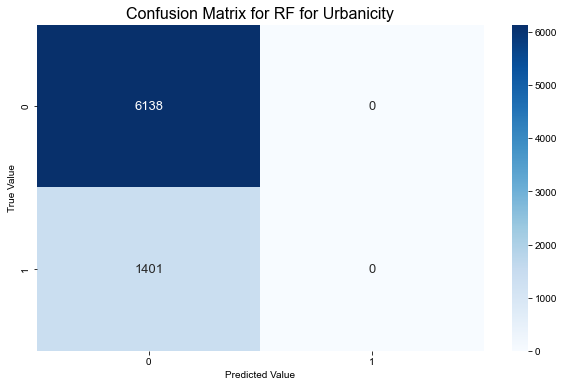

In [20]:
fig, ax = plt.subplots(figsize=(10, 6))
sns.heatmap(cm_rf, annot=True, fmt = "g",cmap = "Blues",annot_kws={"size": 13})
sns.set(font_scale=1.2) # for label size
plt.xlabel('Predicted Value')
plt.ylabel('True Value')
plt.title('Confusion Matrix for RF for Urbanicity', fontsize = 16)
plt.savefig('confusion-matrix-rf-urbanicity.png')

We were not able to pick dropouts at all...

In [22]:
score = classification_report(y_test, y_pred, target_names = ['Not Dropout', 'Dropout'])
print(score)

              precision    recall  f1-score   support

 Not Dropout       0.81      1.00      0.90      6138
     Dropout       0.00      0.00      0.00      1401

    accuracy                           0.81      7539
   macro avg       0.41      0.50      0.45      7539
weighted avg       0.66      0.81      0.73      7539



/Users/kiara/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [23]:
basic_rf = RandomForestClassifier(n_estimators=500)

In [24]:
basic_rf.fit(X_train, y_train)

RandomForestClassifier(n_estimators=500)

In [25]:
y_pred = rf.predict(X_test)
basic_rf.score(X_test,y_test)

0.8141663350577

In [26]:
cm_rf = confusion_matrix(y_test,y_pred)
cm_rf

array([[6138,    0],
       [1401,    0]])

In [27]:
X_train

,Urbanicity_City: Large,Urbanicity_City: Small,Urbanicity_Rural: Distant,Urbanicity_Rural: Fringe,Urbanicity_Rural: Remote,Urbanicity_Suburb: Large,Urbanicity_Suburb: Mid-size,Urbanicity_Suburb: Small,Urbanicity_Town: Distant,Urbanicity_Town: Fringe,Urbanicity_Town: Remote
sid,,,,,,,,,,,
38524,1,0,0,0,0,0,0,0,0,0,0
44358,0,0,0,0,0,1,0,0,0,0,0
41645,0,0,1,0,0,0,0,0,0,0,0
13906,0,0,0,0,0,0,0,0,0,0,1
30401,0,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
27568,0,0,0,0,0,1,0,0,0,0,0
41423,0,0,0,0,0,0,0,0,0,0,1
20621,0,0,0,1,0,0,0,0,0,0,0


In [43]:
#dropouts
dropouts = X[urban_dropouts['dropout'] == 1]
grads = X[urban_dropouts['dropout'] == 0]

In [44]:
dropouts

,Urbanicity_City: Large,Urbanicity_City: Small,Urbanicity_Rural: Distant,Urbanicity_Rural: Fringe,Urbanicity_Rural: Remote,Urbanicity_Suburb: Large,Urbanicity_Suburb: Mid-size,Urbanicity_Suburb: Small,Urbanicity_Town: Distant,Urbanicity_Town: Fringe,Urbanicity_Town: Remote
sid,,,,,,,,,,,
2,0,0,1,0,0,0,0,0,0,0,0
32,0,0,0,0,0,0,0,0,0,0,1
49,0,0,0,0,0,0,0,0,1,0,0
67,0,0,0,0,1,0,0,0,0,0,0
90,0,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
52872,0,0,0,0,0,0,0,0,1,0,0
52888,0,0,0,0,0,0,0,0,1,0,0
52905,0,0,0,1,0,0,0,0,0,0,0


In [45]:
grads

,Urbanicity_City: Large,Urbanicity_City: Small,Urbanicity_Rural: Distant,Urbanicity_Rural: Fringe,Urbanicity_Rural: Remote,Urbanicity_Suburb: Large,Urbanicity_Suburb: Mid-size,Urbanicity_Suburb: Small,Urbanicity_Town: Distant,Urbanicity_Town: Fringe,Urbanicity_Town: Remote
sid,,,,,,,,,,,
5,0,0,0,0,1,0,0,0,0,0,0
12,1,0,0,0,0,0,0,0,0,0,0
13,0,0,0,1,0,0,0,0,0,0,0
14,0,0,0,1,0,0,0,0,0,0,0
15,1,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
52934,0,0,0,0,0,0,0,0,1,0,0
52935,0,0,0,1,0,0,0,0,0,0,0
52937,1,0,0,0,0,0,0,0,0,0,0


<BarContainer object of 11 artists>

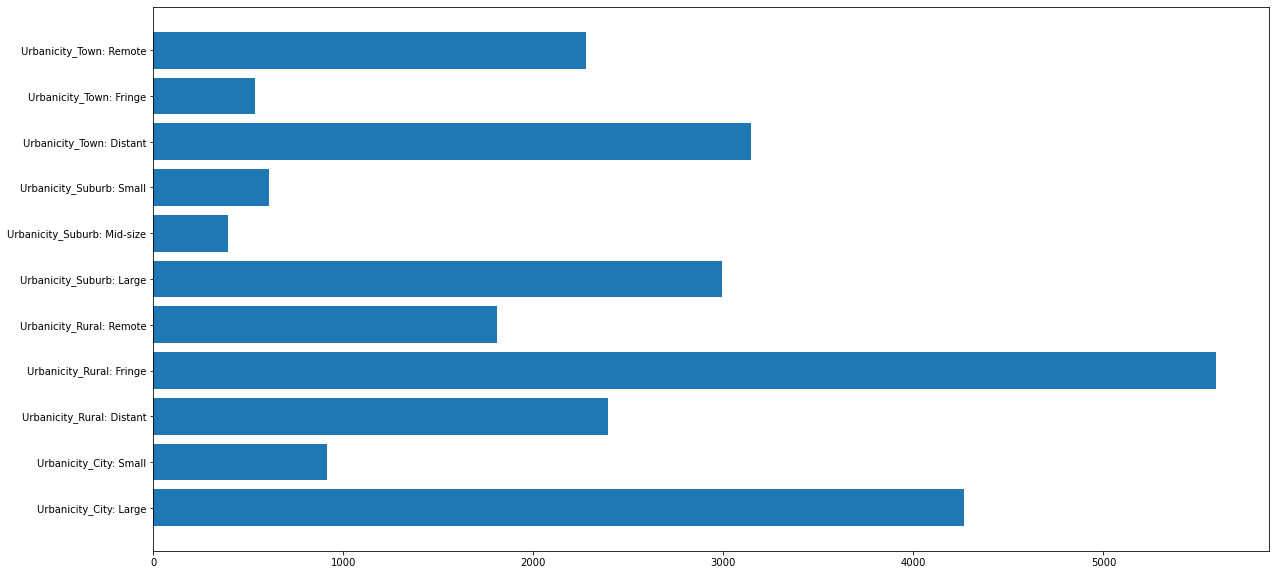

In [50]:
plt.figure(figsize=[20,10])
plt.barh(X.columns, X.sum())

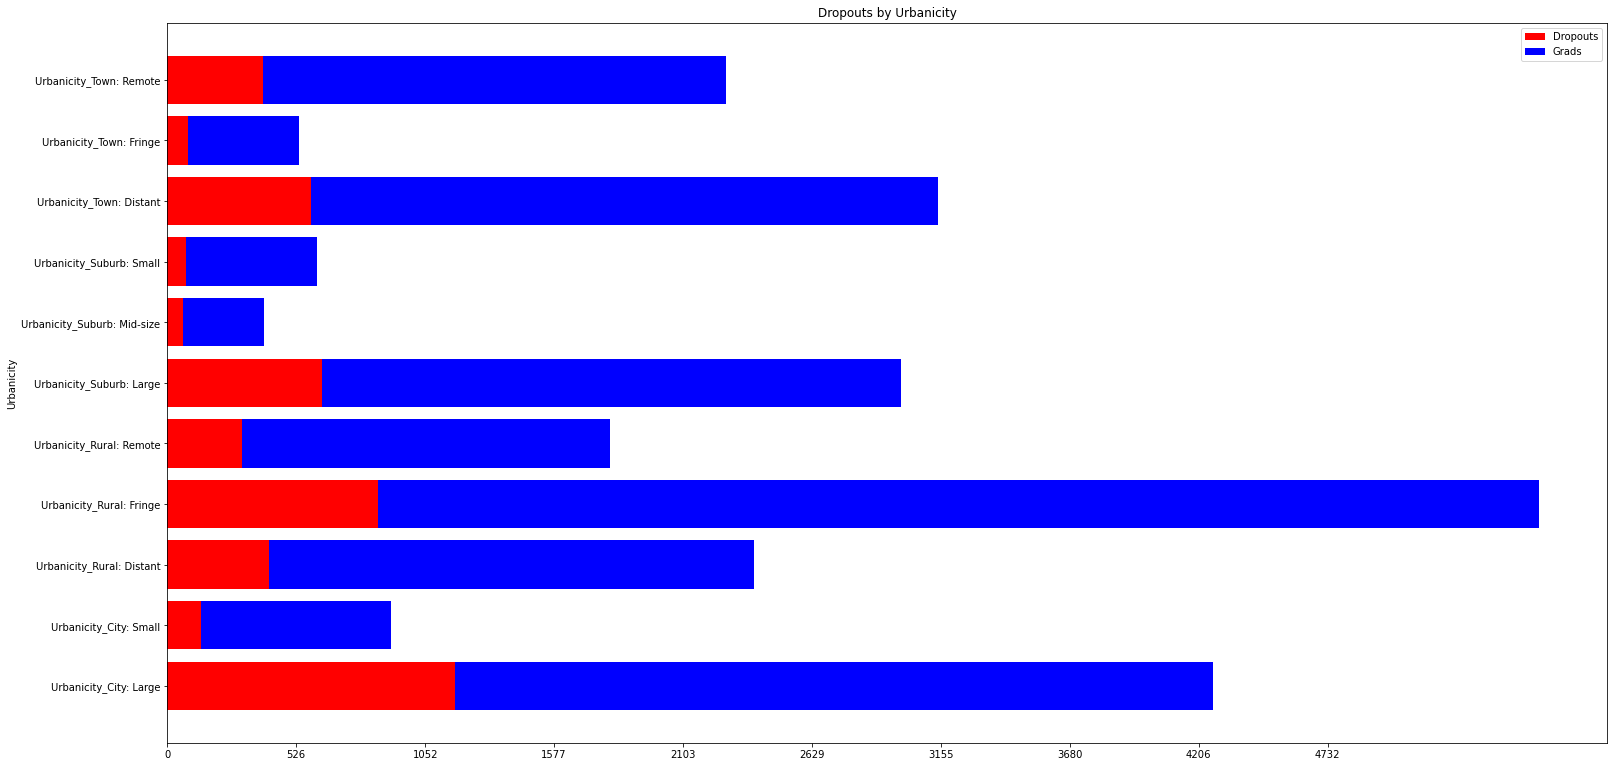

In [59]:
fig = plt.figure(figsize=[20,10])
ax = fig.add_axes([0,0,1,1])
ind = np.linspace(0, grads.sum().max(), 10)
ax.barh(dropouts.columns, dropouts.sum(), color='r')
ax.barh(grads.columns, grads.sum(), left=dropouts.sum(), color='b')
ax.set_ylabel('Urbanicity')
ax.set_title('Dropouts by Urbanicity')
ax.set_xticks(ind)
ax.set_yticks(grads.columns)
ax.legend(labels=['Dropouts', 'Grads'])
plt.show()



In [60]:
##plt.figure(figsize=[20,10])
##plt.barh(grads.columns, grads.sum())

In [61]:
##plt.figure(figsize=[20,10])
##plt.barh()

/Users/kiara/opt/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='urbanicity', ylabel='count'>

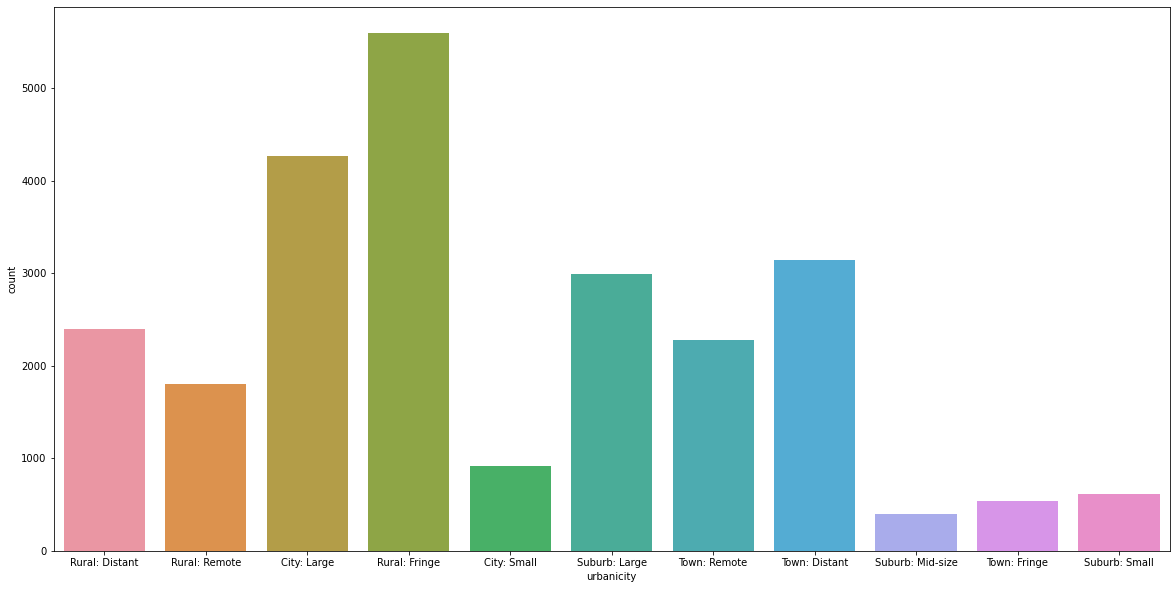

In [67]:
fig, ax2 = plt.subplots(figsize=[20,10])

sns.countplot(urbanicity, 
              ax=ax2)

In [68]:
fig, ax = plt.subplots(figsize=[20,10])

sns.countplot(urbanicity)

sid
2        Rural: Distant
5         Rural: Remote
12          City: Large
13        Rural: Fringe
14        Rural: Fringe
              ...      
52934     Town: Distant
52935     Rural: Fringe
52937       City: Large
52939    Rural: Distant
52941     Suburb: Large
Name: urbanicity, Length: 25128, dtype: object

In [69]:
X

,Urbanicity_City: Large,Urbanicity_City: Small,Urbanicity_Rural: Distant,Urbanicity_Rural: Fringe,Urbanicity_Rural: Remote,Urbanicity_Suburb: Large,Urbanicity_Suburb: Mid-size,Urbanicity_Suburb: Small,Urbanicity_Town: Distant,Urbanicity_Town: Fringe,Urbanicity_Town: Remote
sid,,,,,,,,,,,
2,0,0,1,0,0,0,0,0,0,0,0
5,0,0,0,0,1,0,0,0,0,0,0
12,1,0,0,0,0,0,0,0,0,0,0
13,0,0,0,1,0,0,0,0,0,0,0
14,0,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
52934,0,0,0,0,0,0,0,0,1,0,0
52935,0,0,0,1,0,0,0,0,0,0,0
52937,1,0,0,0,0,0,0,0,0,0,0


In [70]:
urbanicity

sid
2        Rural: Distant
5         Rural: Remote
12          City: Large
13        Rural: Fringe
14        Rural: Fringe
              ...      
52934     Town: Distant
52935     Rural: Fringe
52937       City: Large
52939    Rural: Distant
52941     Suburb: Large
Name: urbanicity, Length: 25128, dtype: object

In [71]:
X

,Urbanicity_City: Large,Urbanicity_City: Small,Urbanicity_Rural: Distant,Urbanicity_Rural: Fringe,Urbanicity_Rural: Remote,Urbanicity_Suburb: Large,Urbanicity_Suburb: Mid-size,Urbanicity_Suburb: Small,Urbanicity_Town: Distant,Urbanicity_Town: Fringe,Urbanicity_Town: Remote
sid,,,,,,,,,,,
2,0,0,1,0,0,0,0,0,0,0,0
5,0,0,0,0,1,0,0,0,0,0,0
12,1,0,0,0,0,0,0,0,0,0,0
13,0,0,0,1,0,0,0,0,0,0,0
14,0,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
52934,0,0,0,0,0,0,0,0,1,0,0
52935,0,0,0,1,0,0,0,0,0,0,0
52937,1,0,0,0,0,0,0,0,0,0,0


In [72]:
y

sid
2        1.0
5        0.0
12       0.0
13       0.0
14       0.0
        ... 
52934    0.0
52935    0.0
52937    0.0
52939    0.0
52941    0.0
Name: dropout, Length: 25128, dtype: float64

In [89]:
cities = pd.DataFrame(X['Urbanicity_City: Large'] + X['Urbanicity_City: Small'], index=X.index())


TypeError: 'Int64Index' object is not callable

In [82]:
X.columns

Index(['Urbanicity_City: Large', 'Urbanicity_City: Small',
       'Urbanicity_Rural: Distant', 'Urbanicity_Rural: Fringe',
       'Urbanicity_Rural: Remote', 'Urbanicity_Suburb: Large',
       'Urbanicity_Suburb: Mid-size', 'Urbanicity_Suburb: Small',
       'Urbanicity_Town: Distant', 'Urbanicity_Town: Fringe',
       'Urbanicity_Town: Remote'],
      dtype='object')